In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from math import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

import emi

Fitted params:
Amplitude: 1.9960107 accuracy: 0.2%
    Delay: 0.0009929 accuracy: 0.7%
    Decay: 0.0020155 accuracy: -0.8%


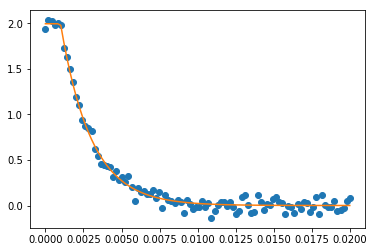

In [2]:
params = {'amplitude':2.0, 'delay':0.001, 'decay':0.002, 'n_samples':100}
time, samples = emi.generate_sample(**params)
samples = samples + np.random.normal(0, 0.05, len(samples))

x, y = time, samples
pw, cov = emi.fit_exponential_decay(x, y)
plt.plot(x, y, 'o', x, emi.exponential_decay(x, *pw), '-')
print('Fitted params:')
print('Amplitude: {:.7f} accuracy: {:.1f}%'.format(pw[0], 100 * emi.relative_accuracy(pw[0], params['amplitude'])))
print('    Delay: {:.7f} accuracy: {:.1f}%'.format(pw[1], 100 * emi.relative_accuracy(pw[1], params['delay'])))
print('    Decay: {:.7f} accuracy: {:.1f}%'.format(pw[2], 100 * emi.relative_accuracy(pw[2], params['decay'])))